1) Installation + **Imports**

In [8]:
!pip install pandas numpy scikit-learn matplotlib seaborn category_encoders

import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import category_encoders as ce

2. LOAD DATASET


In [4]:
df = pd.read_csv("/content/drive/MyDrive/creditcard.csv")


NameError: name 'pd' is not defined

In [8]:
import os
import zipfile
import pandas as pd

zip_file_path = '/content/drive/MyDrive/creditcard.csv.zip'

if os.path.exists(zip_file_path):
    print(f"File found: {zip_file_path}")
    with zipfile.ZipFile(zip_file_path, 'r') as z:
        # Assuming 'creditcard.csv' is directly inside the zip file
        if 'creditcard.csv' in z.namelist():
            with z.open('creditcard.csv') as csv_file:
                df = pd.read_csv(csv_file)
            print("creditcard.csv loaded successfully from the zip file.")
            display(df.head())
        else:
            print(f"Error: 'creditcard.csv' not found inside {zip_file_path}. Content of zip: {z.namelist()}")
elif os.path.exists('/content/drive/MyDrive/creditcard.csv'):
    print("It seems you have an unzipped 'creditcard.csv' directly in MyDrive. Loading that instead.")
    df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
    display(df.head())
else:
    print(f"Error: Neither '{zip_file_path}' nor '/content/drive/MyDrive/creditcard.csv' found.")
    print("Please ensure 'creditcard.csv.zip' is uploaded to your Google Drive and placed in 'My Drive' folder.")


It seems you have an unzipped 'creditcard.csv' directly in MyDrive. Loading that instead.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


3. SIMPLE PREPROCESSING

In [10]:
df = df.drop_duplicates()

imputer = SimpleImputer(strategy="median")
df[df.columns] = imputer.fit_transform(df)

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/tmp/ipython-input-3984003479.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = imputer.fit_transform(df)


4. EDA

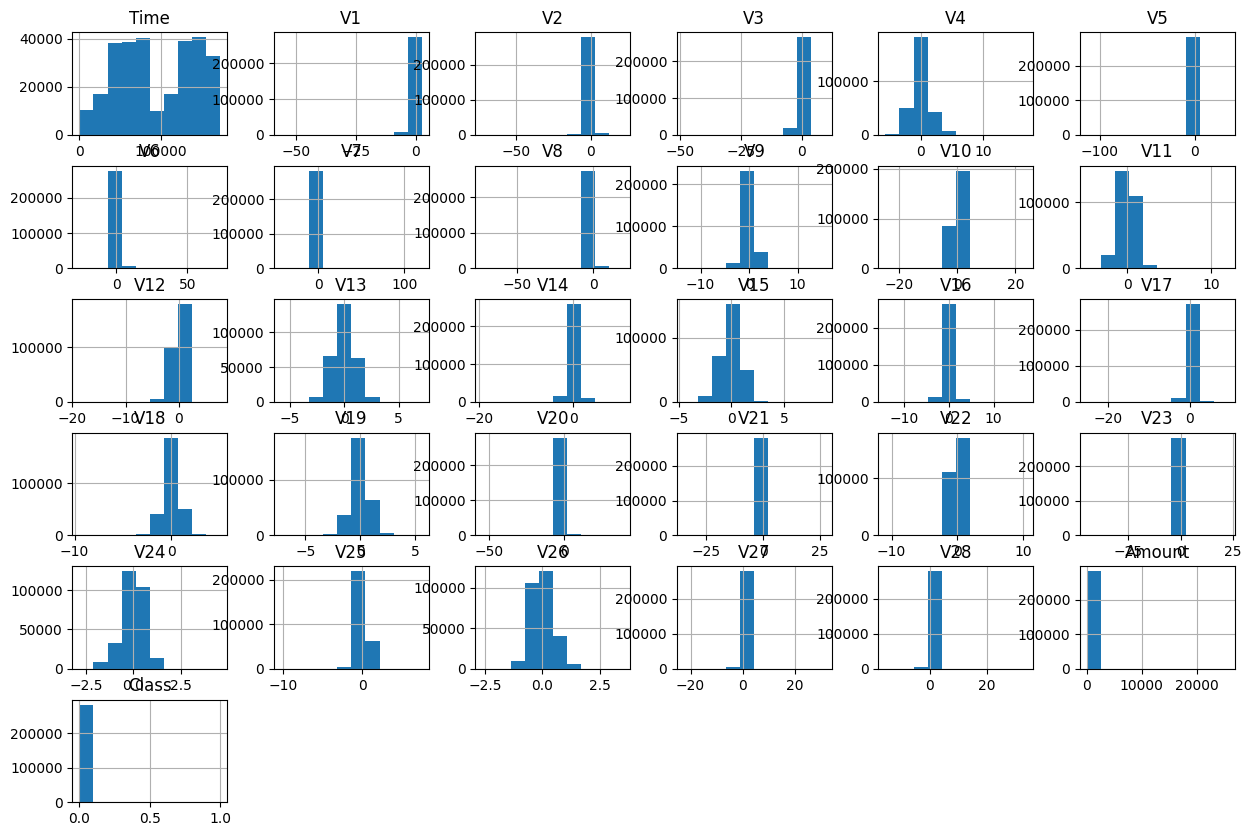

In [11]:
df.hist(figsize=(15,10))
plt.show()


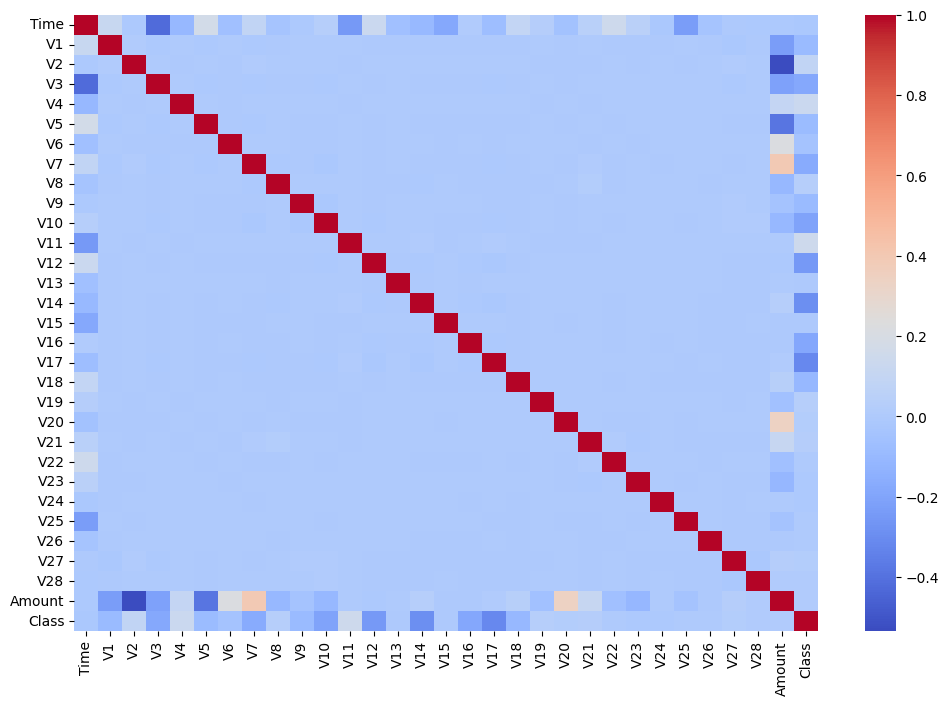

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()
